## Simple Linear Regression

### Step 1 : Import Required Liabraries

In [37]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

### Step 2: Read the DataSet

In [2]:
url="https://raw.githubusercontent.com/goradbj/MachineLearning/main/Regression/Road-Accidents-2018-Annexure-1.csv"
df=pd.read_csv(url)

In [3]:
df.head()

,Years,Total Number of Road Accidents (in numbers),Total Number of Persons Killed (in numbers),Total Number of Persons Injured (in numbers),Population of India (in thousands),Total Number of Registered Motor Vehicles (in thousands),Road Length (in kms),Number of Accidents per Lakh Population,Number of Accidents per Ten Thousand Vehicles,Number of Accidents Per Ten Thousand Kms of Roads,Number of Persons Killed Per Lakh Population,Number of Persons Killed Per Ten Thousand Vehicles,Number of Persons Killed per Ten Thousand Kms of Roads,Number of Persons Injured per Lakh Population,Number of Persons Injured Per Ten Thousand Vehicles,Number of Persons Injured Per Ten Thousand Kms of Roads
0,1970,114100.0,14500.0,70100.0,539000.0,1401.0,1188728.0,21.2,814.4,959.8,2.7,103.5,122.0,13.0,500.4,589.7
1,1980,153200.0,24000.0,109100.0,673000.0,4521.0,1491873.0,22.8,338.9,1026.9,3.6,53.1,160.9,16.2,241.3,731.3
2,1990,282600.0,54100.0,244100.0,835000.0,19152.0,1983867.0,33.8,147.6,1424.5,6.5,28.2,272.7,29.2,127.5,1230.4
3,1994,325864.0,64463.0,311500.0,904000.0,27660.0,2890950.0,36.0,117.8,1127.2,7.1,23.3,223.0,34.5,112.6,1077.5
4,1995,351999.0,70781.0,323200.0,924359.0,30295.0,2975035.0,38.1,116.2,1183.2,7.7,23.4,237.9,35.0,106.7,1086.4


### Step 3 : Exploratory Data Analysis and Data Preprocessing

In [4]:
df.shape

(29, 16)

In [5]:
df.columns

Index(['Years', 'Total Number of Road Accidents (in numbers)',
       'Total Number of Persons Killed (in numbers)',
       'Total Number of Persons Injured (in numbers)',
       'Population of India (in thousands)',
       'Total Number of Registered Motor Vehicles (in thousands)',
       'Road Length (in kms)', 'Number of Accidents per Lakh Population',
       'Number of Accidents per Ten Thousand Vehicles',
       'Number of Accidents Per Ten Thousand Kms of Roads',
       'Number of Persons Killed Per Lakh Population',
       'Number of Persons Killed Per Ten Thousand Vehicles',
       'Number of Persons Killed per Ten Thousand Kms of Roads',
       'Number of Persons Injured per Lakh Population',
       'Number of Persons Injured Per Ten Thousand Vehicles',
       'Number of Persons Injured Per Ten Thousand Kms of Roads'],
      dtype='object')

In [6]:
# Select only relevant columns for building model
df=df[['Years','Total Number of Persons Killed (in numbers)']]

In [7]:
df.head()

,Years,Total Number of Persons Killed (in numbers)
0,1970,14500.0
1,1980,24000.0
2,1990,54100.0
3,1994,64463.0
4,1995,70781.0


In [8]:
df.tail()

,Years,Total Number of Persons Killed (in numbers)
24,2015,146133.00
25,2016,150785.00
26,2017,147913.00
27,2018,151417.00
28,CAGR 2008/2018,2.36


In [9]:
#Drop that records which are not in proper format
mdf=df.drop(df.index[28])

In [10]:
mdf.tail()

,Years,Total Number of Persons Killed (in numbers)
23,2014,139671.0
24,2015,146133.0
25,2016,150785.0
26,2017,147913.0
27,2018,151417.0


In [11]:
#Check Missing Values
mdf.isnull().sum()

Years                                          0
Total Number of Persons Killed (in numbers)    0
dtype: int64

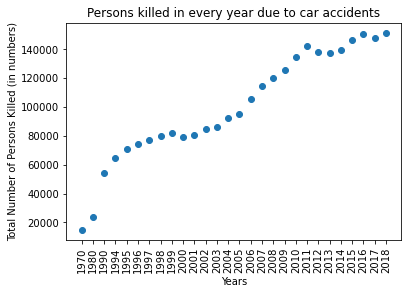

In [12]:
#Data Visualization
plt.scatter(mdf["Years"],mdf["Total Number of Persons Killed (in numbers)"])
plt.xlabel("Years")
plt.ylabel("Total Number of Persons Killed (in numbers)")
plt.title("Persons killed in every year due to car accidents")
plt.xticks(rotation='vertical')
plt.show()

By observing this graph we can say that,year and no of people died is having linear relationship

y=mx+c

No.of people died = m * Years + c

In [21]:
#Divide Data Vertically
X=mdf[["Years"]]
y=mdf[["Total Number of Persons Killed (in numbers)"]]

In [22]:
X.head()

,Years
0,1970
1,1980
2,1990
3,1994
4,1995


In [23]:
y.head()

,Total Number of Persons Killed (in numbers)
0,14500.0
1,24000.0
2,54100.0
3,64463.0
4,70781.0


In [24]:
print(mdf.shape)
print(X.shape)
print(y.shape)

(28, 2)
(28, 1)
(28, 1)


In [25]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Years                                        28 non-null     object 
 1   Total Number of Persons Killed (in numbers)  28 non-null     float64
dtypes: float64(1), object(1)
memory usage: 672.0+ bytes


In [26]:
#Divide Data Horizontally
X_tr,X_te,y_tr,y_te=train_test_split(X,y,test_size=0.2)

In [27]:
print(mdf.shape)
print(X.shape)
print(y.shape)
print(X_tr.shape)
print(X_te.shape)
print(y_tr.shape)
print(y_te.shape)

(28, 2)
(28, 1)
(28, 1)
(22, 1)
(6, 1)
(22, 1)
(6, 1)


### Step : 4 - Build Model

In [28]:
rapmodel=linear_model.LinearRegression()
rapmodel.fit(X_tr,y_tr)

LinearRegression()

In [29]:
#Value of m
rapmodel.coef_

array([[3238.70725633]])

In [30]:
#Value of C
rapmodel.intercept_

array([-6387416.72980614])

### Step 5 : Do Prediction

In [31]:
rapmodel.predict([[2018]])

array([[148294.51346257]])

In [32]:
y_pred=rapmodel.predict(X_te)
y_pred

array([[132100.97718094],
       [ 57610.71028541],
       [141817.09894992],
       [138578.39169359],
       [106191.31913032],
       [ 86759.07559235]])

### Step 6 : Evaluate Model

In [38]:
print("Mean Absolute Error is    :",mean_absolute_error(y_pred,y_te))
print("Mean Squared Error is     :",mean_squared_error(y_te,y_pred))
print("Root Mean Squared Error is:",np.sqrt(mean_squared_error(y_te,y_pred)))
print("R2 score is               :",r2_score(y_te,y_pred))

Mean Absolute Error is    : 6920.106197271652
Mean Squared Error is     : 54781499.872839004
Root Mean Squared Error is: 7401.452551549527
R2 score is               : 0.9581863995413844


#### Our Model Gives 95% Accuracy

### Step 7 : Plot prediction Line

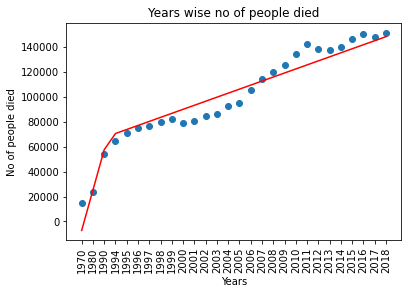

In [39]:
plt.scatter(mdf['Years'],mdf['Total Number of Persons Killed (in numbers)'])
plt.plot(mdf['Years'],rapmodel.predict(mdf[['Years']]),color='red')
plt.xticks(rotation='vertical')
plt.xlabel("Years")
plt.ylabel("No of people died")
plt.title("Years wise no of people died")
plt.show()